In [10]:
from google.colab import drive
drive.mount('/content/drive/')
# The following code ensures that all of the project members are able to mount the notebook to their specific drive and retrieve any directory-specific data.

# Calvin's directory
# %cd /content/drive/MyDrive/2022-23/CS 182/Project 
# Alec's directory
# %cd /content/drive/MyDrive/182/fa22-cs182-proj
# Anthony's directory
# %cd /content/drive/MyDrive/
# Joey's directory 
# %cd /content/drive/MyDrive/fa22-cs182-proj 

%cd /content/drive/MyDrive # Comment out if you are one of the project members, leave it in if you are staff

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/2022-23/CS 182/Project
[Errno 2] No such file or directory: '/content/drive/MyDrive/182/fa22-cs182-proj'
/content/drive/MyDrive/2022-23/CS 182/Project
[Errno 2] No such file or directory: '/content/drive/MyDrive/fa22-cs182-proj'
/content/drive/MyDrive/2022-23/CS 182/Project


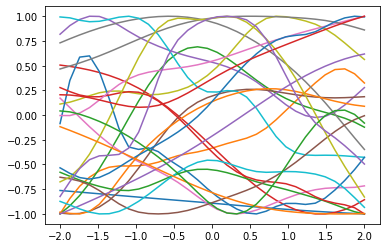

In [3]:
import numpy as np
import matplotlib.pyplot as plt

resolution = 32
N = resolution

# Code for renerating random foo's. We start with random combinations of sinusoids which resemble
# pretty reasonable, SVD-like hypothesis that real-life scenarios have high low-energy and low high-energy terms.
r = lambda: (np.random.uniform(0, 1) - 0.5) * 2
wave = lambda amp, freq: lambda x: amp * np.sin((freq + 0.1*r()) * x + 10 * r()) * r()
foo = lambda: lambda x: wave(4, 1.4)(x) + wave(2, 3)(x) + wave(0.4, 5.2)(x) + wave(0.6, 8.2)(x)

# More complex combinations of random foo's that throw in polynomial arguments
def random_smooth_signal():
  rfuncs = [foo() for i in range(6)]
  lfunc1 = lambda x: 0.25 * r() * foo()(x) * foo()(x) + x + 0.2 * r() * x * x + 0.1 * r() * x * x * x * foo()(x)
  pfunc = lambda x: foo()(x) * r() * foo()(x) + r() * foo()(x) * foo()(x)
  return lambda x: pfunc(lfunc1(x)) * foo()(x) * foo()(x)

# Combining multiple smooth signals
convolve = lambda func, shifts, kernel: lambda x: sum([func(x - shifts[i]) * kernel[i] for i in range(len(shifts))])
rlincomb = lambda funcs: lambda x: sum([f(x) * r() for f in funcs])

# The final combination which brings in random branching and convolutions
def random_function(x_min, x_max, N):
  x = np.linspace(x_min, x_max, N)
  kern_space = np.linspace(-0.05 * (x_min + x_max), 0.05 * (x_min + x_max), 10)
  kern_func = lambda x: np.exp(-0.5 * x * x / (0.05 * 0.05))
  kern = kern_func(kern_space)
  base = random_smooth_signal()
  if r() < 0:
    conv1 = convolve(base, kern_space, kern)
  else:
    conv1 = convolve(base, [-0.02, 0, 0.02], [-1, 0, 1])
  if r() < 0:
    conv2 = convolve(conv1, kern_space, [0.1 + 0.3 * r() for i in range(10)])
  else:
    conv2 = convolve(conv1, kern_space, [0.5, 0.25, 0.1, 0.05, 0, 0, 0.05, 0.1, 0.25, 0.5])
  total = lambda x: r() * base(x  / max(10, r() * 40)) + r() * conv1(x + r() * (x ** 2) * 0.1 + r() * r() * (x ** 3) * 0.001) + r() * conv2(x)
  y3 = total((x + 2 * r()) / max(7.5, r() * 30))
  for y in y3:
    y = max(0, y)
  y3 /= max(np.abs(y3))
  return y3

# Generate random functions for display
n = resolution
for i in range(5):
  for j in range(5):
    x = np.linspace(-2, 2, n)
    y = random_function(-2, 2, n)
    pole = lambda x: r() / (x - r() * 2)
    plt.plot(x, y)
  # plt.show()

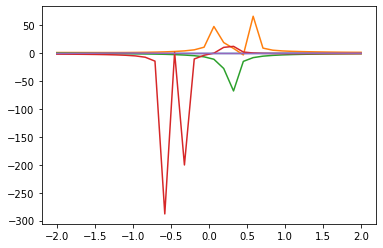

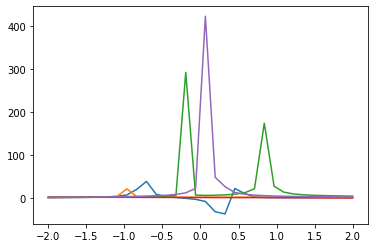

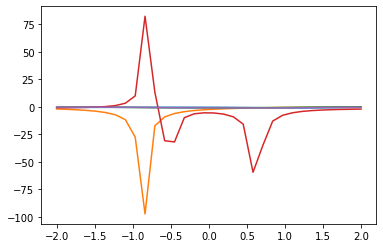

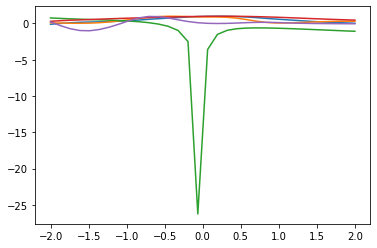

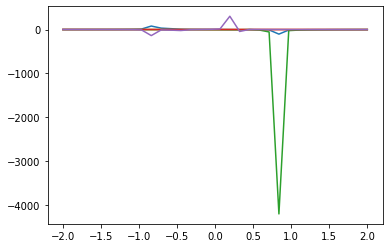

In [4]:
def random_function_with_poles(x_min, x_max, N):
  y = random_function(x_min, x_max, N)
  for i in range(int(1 + r() * 4)):
    pole_func = lambda x: r() / (abs((x - r()) ** 1/3))
    pole = pole_func(x)
    np.clip(pole, -N, N)
    y += pole
  return y

# Generate 25 random functions with very high walls and wells
for i in range(5):
  for j in range(5):
    x = np.linspace(-2, 2, n)
    y = random_function_with_poles(-2, 2, n)
    plt.plot(x, y)
  plt.show()



In [5]:
!pip install qmsolve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=26285d502dd1a54eb2642c78968a03d8b4c4934256248f2f6ae82c51f1f56eb3
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar


Took 2.2838494777679443
(401, 32, 32)


Took 2.8272006511688232
(401, 32, 32)


Took 3.3643245697021484
(401, 32, 32)


Took 3.654118061065674
(401, 32, 32)


Took 4.840540409088135
(401, 32, 32)


Took 5.6287078857421875
(401, 32, 32)


Took 3.5815272331237793
(401, 32, 32)


Took 3.581897258758545
(401, 32, 32)


Took 1.6071388721466064
(401, 32, 32)


Took 1.617586612701416
(401, 32, 32)


Took 1.503892421722412
(401, 32, 32)


Took 1.5475311279296875
(401, 32, 32)


Took 1.5296399593353271
(401, 32, 32)


Took 1.5342001914978027
(401, 32, 32)


Took 1.6635940074920654
(401, 32, 32)


Took 1.5637028217315674
(401, 32, 32)


Took 1.46999192237854
(401, 32, 32)


Took 1.498600959777832
(401, 32, 32)


Took 1.5190908908843994
(401, 32, 32)


Took 1.6442599296569824
(401, 32, 32)


Took 1.587524175643921
(401, 32, 32)


Took 1.5124051570892334
(401, 32, 32)


Took 1.495311975479126
(401, 32, 32)


Took 1.7178633213043213
(401, 32, 32)


Took 2.381363868713379
(401, 32, 32)


Took 2.172360420227051
(401, 32, 32)


Took 1.5478146076202393
(401, 32, 32)


Took 1.5273315906524658
(401, 32, 32)


Took 1.5431787967681885
(401, 32, 32)


Took 1.5470268726348877
(401, 32, 32)


Took 1.6185002326965332
(401, 32, 32)


Took 1.5672285556793213
(401, 32, 32)


Took 1.5497074127197266
(401, 32, 32)


Took 1.5419049263000488
(401, 32, 32)


Took 1.5544395446777344
(401, 32, 32)


Took 1.559375524520874
(401, 32, 32)


Took 1.6281955242156982
(401, 32, 32)


Took 1.6162540912628174
(401, 32, 32)


Took 1.7021515369415283
(401, 32, 32)


Took 1.6682844161987305
(401, 32, 32)


Took 1.6004774570465088
(401, 32, 32)


Took 1.6898987293243408
(401, 32, 32)


Took 1.663558006286621
(401, 32, 32)


Took 1.6140618324279785
(401, 32, 32)


Took 1.7217962741851807
(401, 32, 32)


Took 1.61619234085083
(401, 32, 32)


Took 1.628014087677002
(401, 32, 32)


Took 1.5993115901947021
(401, 32, 32)


Took 1.7480201721191406
(401, 32, 32)


Took 2.4344327449798584
(401, 32, 32)
total dataset size: (2500, 9, 32, 32, 2)
done
data shape: (2500, 9, 32, 32, 2)


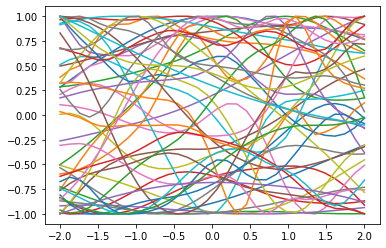

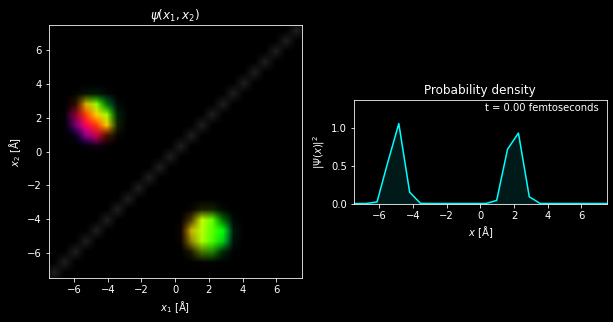

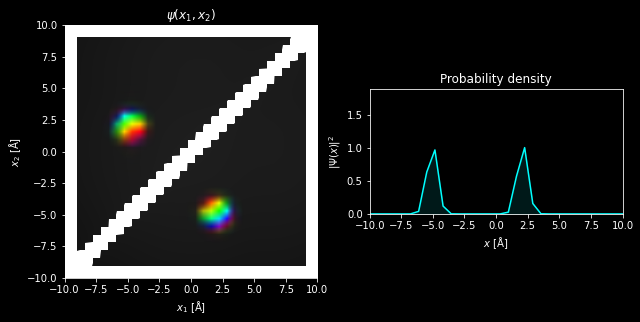

In [6]:
# Code for generating data with resolution according to the variable named resolution.

import numpy as np
import torch
import matplotlib.pyplot as plt
from qmsolve import Hamiltonian, TwoFermions, TimeSimulation, init_visualization,Å,m_e, femtoseconds
import pickle

class DataGenerator:
	def __init__(self):
		self.data = []
		self.potential = None
		self.sims = []

	#interaction potential
	def harmonic_oscillator_plus_coulomb_interaction(self, fermions):
		k = 0.5
		V_harmonic = 0.5*k*fermions.x1**2 + 0.5*k*fermions.x2**2

		k = 30.83
		r = np.abs(fermions.x1 - fermions.x2)
		r = np.where(r < 0.0001, 0.0001, r)
		V_coulomb_interaction = k/ r

		return V_harmonic + V_coulomb_interaction

		#interaction potential
	def random_potential_plus_coulomb_interaction(self, fermions):
		k = 0.5
		potential = random_function(-2, 2, resolution)
		plt.plot(np.linspace(-2, 2, N), potential)
		# plt.show()

		potential[0] = 5000
		potential[-1] = 5000
		V_random = (np.tile(potential, (N, 1)) + np.tile(potential, (N, 1)).T) * 100
		self.potential = V_random

		k = 30.83
		r = np.abs(fermions.x1 - fermions.x2)
		r = np.where(r < 0.0001, 0.0001, r)
		V_coulomb_interaction = k/ r

		return V_random + V_coulomb_interaction

	def generate_data(self, n=50, split_proportion=50, store_steps = 400, N = resolution):
		data = None
		for _ in range(n):
			#build the Hamiltonian of the system
			H = Hamiltonian(particles = TwoFermions(),
				potential = self.random_potential_plus_coulomb_interaction,
				spatial_ndim = 1, N = N, extent = 20*Å)

			total_time = 1. * femtoseconds
			sim = TimeSimulation(hamiltonian = H, method = "split-step")
			sim.run(self.initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = store_steps)
			# visualization = init_visualization(sim)
			# visualization.plot(t = 1, xlim=[-7.5* Å,7.5* Å], potential_saturation = 0.5, wavefunction_saturation = 0.2)
			# visualization.animate(xlim=[-10* Å,10* Å], potential_saturation = 500, wavefunction_saturation = 0.2, animation_duration = 10, save_animation = True)
			sim.potential = self.potential
			self.sims.append(sim)

			data = np.copy(sim.__dict__['Ψ'])
			print(data.shape)
			data_real = np.real(data)
			data_imag = np.imag(data)
			data = np.stack([data_real, data_imag], axis=-1)
			# print(data.shape)
			split_size = store_steps // split_proportion
			for i in range(split_proportion):
				data_split = data[i * split_size : (i + 1) * split_size]
				potential_data = np.stack([self.potential, self.potential], axis=-1)
				potential_data = np.array([potential_data])
				# print(potential_data.shape)
				# print(data_split.shape)
				data_split = np.concatenate([potential_data, data_split], axis=0)
				self.data.append(data_split)
				# print("data split size:", self.data[i].shape)

		# Shape of self.data is currently [training index] * [# frames] * [x] * [y].
		# We want to split into channels such that we get [training index] * [# frames] * [x] * [y] * [real, img] (2)
		print("total dataset size:", np.array(self.data).shape)

		return np.array(self.data), self.sims


	def initial_wavefunction(self, particle):
			#This wavefunction correspond to two stationary gaussian wavepackets. The wavefunction must be antisymmetric: Ψ(x1,x2) = -Ψ(x2,x1)
			σ = 0.4 * Å
			x1 = particle.x1
			x2 = particle.x2
			𝜇01 = -5.0*Å
			𝜇02 = 2.0*Å

			return (np.exp(-(x1 - 𝜇01)**2/(4*σ**2))*np.exp(-(x2 - 𝜇02)**2/(4*σ**2)) * np.exp((r() * x1 + r() * x2) * 1j)
							- np.exp(-(x1 - 𝜇02)**2/(4*σ**2))*np.exp(-(x2 - 𝜇01)**2/(4*σ**2))) * np.exp((r() * x1 + r() * x2) * 1j)

for i in range(0, 1):
	d = DataGenerator()
	data, sims = d.generate_data()
	print("done")
	print("data shape:", data.shape)
	np.save("small_data_%d" % i, data)

	with open('small_data_generator_%d' % i, 'wb') as dgen_file:
		pickle.dump(d, dgen_file)

with open('small_data_generator_0', 'rb') as dgen_file:
	d_load = pickle.load(dgen_file)

# print(d_load.sims[0].potential.shape)

visualization = init_visualization(d_load.sims[0])
visualization.plot(t = 0, xlim=[-7.5* Å,7.5* Å], potential_saturation = 0.5, wavefunction_saturation = 0.2)
visualization.animate(xlim=[-10* Å,10* Å], potential_saturation = 500, wavefunction_saturation = 0.2, animation_duration = 10, save_animation = True)

Took 1.62074613571167


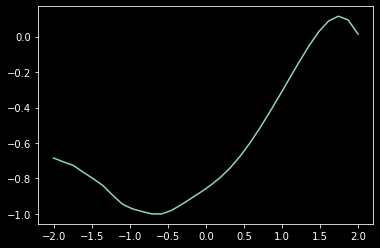

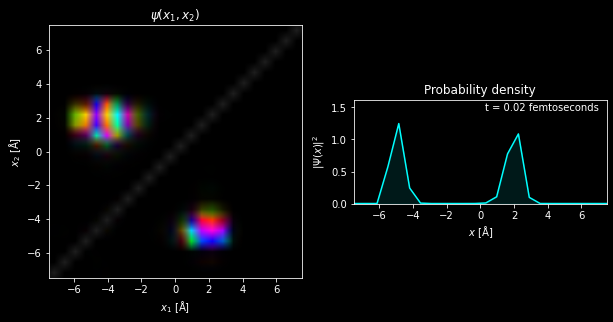

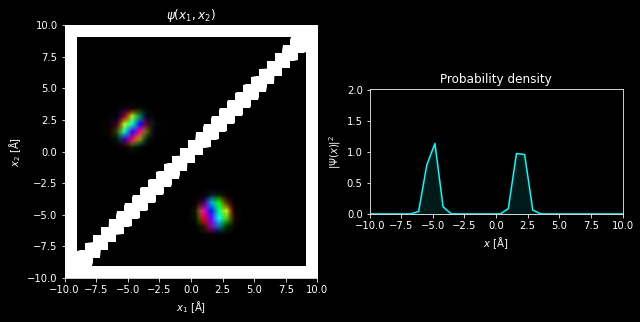

In [7]:
# Example animation block

H = Hamiltonian(particles = TwoFermions(),
	potential = d.random_potential_plus_coulomb_interaction,
	spatial_ndim = 1, N = 32, extent = 20*Å)

total_time = 1. * femtoseconds
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(d.initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = 400)

visualization = init_visualization(sim)
visualization.plot(t = 1, xlim=[-7.5* Å,7.5* Å], potential_saturation = 0.5, wavefunction_saturation = 0.2)

visualization.animate(xlim=[-10* Å,10* Å], potential_saturation = 500, wavefunction_saturation = 0.2, animation_duration = 10, save_animation = True)

dict_keys(['H', 'Vmin', 'Vmax', 'method', 'store_steps', 'total_time', 'Nt_per_store_step', 'dt', 'Ψ', 'Ψmax', 'Ψ_plot'])
total frames: 400
total time: 41.34137333518212
time steps per frame 20
time per time step 0.005167671666897765
time calculated as (time per time step) * (time steps per frame) * (total frames) 41.34137333518212
---Modified animation---
total frames: 800
total time: 41.34137333518212
time steps per frame 20
time per time step 0.005167671666897765
time calculated as (time per time step) * (time steps per frame) * (total frames) 82.68274667036424


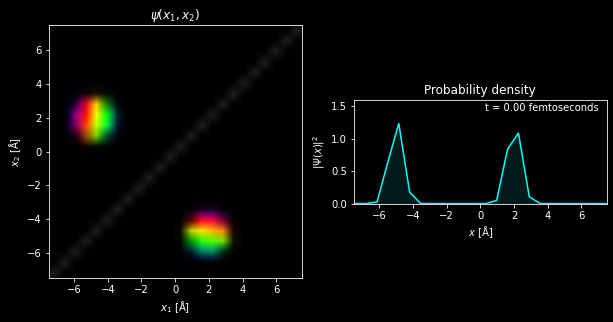

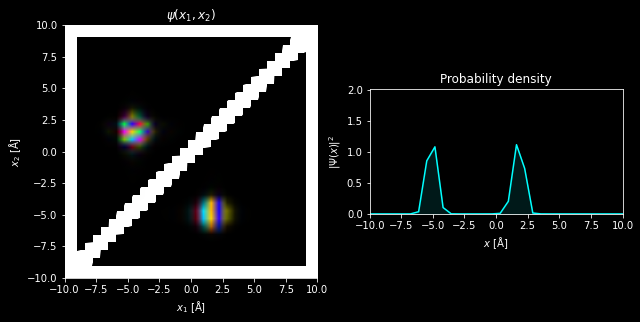

In [8]:
# Test for appending frames to an animation

simdict = sim.__dict__
print(simdict.keys())
print('total frames:', simdict['store_steps'])
print('total time:', simdict['total_time'])
print('time steps per frame', simdict['Nt_per_store_step'])
print('time per time step', simdict['dt'])
print('time calculated as (time per time step) * (time steps per frame) * (total frames)', simdict['dt'] * simdict['Nt_per_store_step'] * simdict['store_steps'])

print('---Modified animation---')
simdict['Ψ'] = np.concatenate([simdict['Ψ'], np.zeros(simdict['Ψ'].shape)])
simdict['store_steps'] += 400
simdict['total time'] = simdict['dt'] * simdict['Nt_per_store_step'] * simdict['store_steps']
print('total frames:', simdict['store_steps'])
print('total time:', simdict['total_time'])
print('time steps per frame', simdict['Nt_per_store_step'])
print('time per time step', simdict['dt'])
print('time calculated as (time per time step) * (time steps per frame) * (total frames)', simdict['dt'] * simdict['Nt_per_store_step'] * simdict['store_steps'])

visualization = init_visualization(sim)
visualization.plot(t = 0, xlim=[-7.5* Å,7.5* Å], potential_saturation = 0.5, wavefunction_saturation = 0.2)

visualization.animate(xlim=[-10* Å,10* Å], potential_saturation = 500, wavefunction_saturation = 0.2, animation_duration = 10, save_animation = True)

In [9]:
# Deprecated
def generate_data():
  #build the Hamiltonian of the system
  H = Hamiltonian(particles = TwoFermions(),
    potential = harmonic_oscillator_plus_coulomb_interaction,
    spatial_ndim = 1, N = 200, extent = 20*Å)

  total_time = 1. * femtoseconds
  sim = TimeSimulation(hamiltonian = H, method = "split-step")
  sim.run(initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = 400)
